## Observations and Insights 

In [162]:
%matplotlib notebook

In [163]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "C:/Users/cjbei/Desktop/Matplotlib-Homework-Power-of-Plots/Resources/Mouse_metadata.csv"
study_results_path = "C:/Users/cjbei/Desktop/Matplotlib-Homework-Power-of-Plots/Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df=pd.DataFrame(mouse_metadata)
study_df=pd.DataFrame(study_results)
mouse_and_study_df=pd.merge(mouse_df,study_df)
# Display the data table for preview
mouse_and_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [164]:
# Checking the number of mice.
number_mice=mouse_and_study_df["Mouse ID"].count()
number_mice

1893

In [165]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id_unique=mouse_and_study_df["Mouse ID"].unique()

mouse_time= mouse_and_study_df.groupby("Mouse ID")["Timepoint"].unique()
mouse_time

Mouse ID
a203    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a251    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a262    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a275    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
a366                [0, 5, 10, 15, 20, 25, 30]
                         ...                  
z435                                [0, 5, 10]
z578    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
z581    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
z795    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
z969    [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
Name: Timepoint, Length: 249, dtype: object

In [166]:
# Optional: Get all the data for the duplicate mouse ID. 



In [167]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= mouse_and_study_df.set_index("Mouse ID").drop_duplicates()
clean_df2=pd.DataFrame(clean_df)
clean_df2

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [168]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [133]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Sortby_Regimen=clean_df2.groupby(["Drug Regimen"])
Drug_Regimen_mean= Sortby_Regimen["Tumor Volume (mm3)"].mean()
Drug_Regimen_median=Sortby_Regimen["Tumor Volume (mm3)"].median()
Drug_Regimen_Variance=Sortby_Regimen["Tumor Volume (mm3)"].var()
Drug_Regimen_Standarddeviation= Sortby_Regimen["Tumor Volume (mm3)"].std()
Drug_Regimen_SEM= Sortby_Regimen["Tumor Volume (mm3)"].sem()

Summary_Drug_Regimen=({"Mean":Drug_Regimen_mean,"Median":Drug_Regimen_median,"Variance":Drug_Regimen_Variance,"Standard Deviation":Drug_Regimen_Standarddeviation, "SEM":Drug_Regimen_SEM})
Summary_Drug_Regimen_df=pd.DataFrame(Summary_Drug_Regimen)
Summary_Drug_Regimen_df
# This method produces everything in a single groupby function


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,53.019963,51.852437,42.782010,6.540796,0.494438
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.134515,52.343085,60.928203,7.805652,0.583422
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.195673,40.668343,23.488945,4.846539,0.321676
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


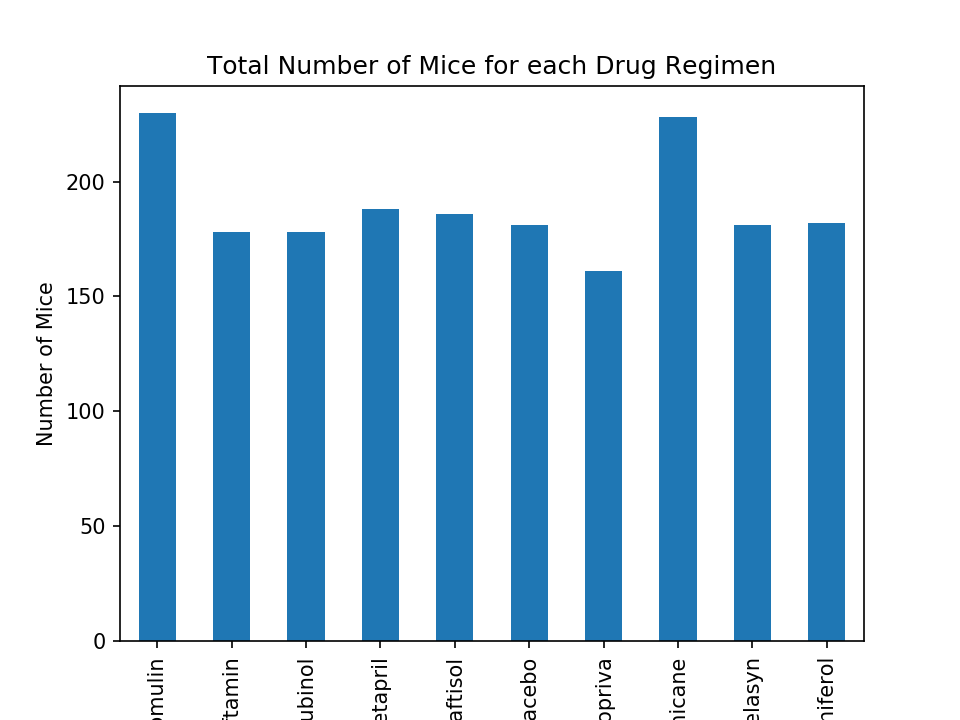

Text(0, 0.5, 'Number of Mice')

In [170]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Total_number_mice_treatments= mouse_and_study_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
Total_number_mice_treatments

Total_number_mice_treatments.plot(kind="bar")

plt.title("Total Number of Mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

Text(0, 0.5, 'Number of Mice')

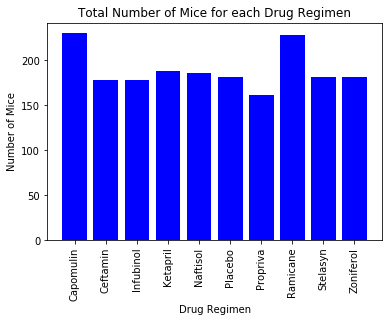

In [145]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# I used Total_number_mice_treatments variable to find the number of treatments
Treatments=[230,178,178,188,186,181,161,228,181,182]
Ticks=["Capomulin","Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"] 

x_axis=np.arange(len(Total_number_mice_treatments))
plt.bar(x_axis,Treatments, color="b", align="center")

tick_locations=[x for x in x_axis]
plt.xticks(tick_locations,["Capomulin","Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],rotation="vertical")
plt.title("Total Number of Mice for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

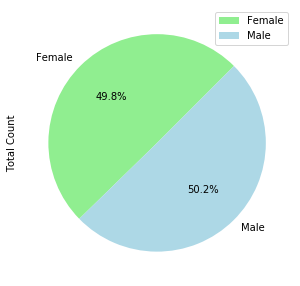

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender= mouse_and_study_df.groupby(["Sex","Mouse ID"])
mouse_gender_df=pd.DataFrame(Gender.size())

gender_mouseid=mouse_gender_df.groupby(["Sex"]).count()

gender_mouseid.columns=["Total Count"]

gender_mouseid["Percent of Sex"]= 100*(gender_mouseid["Total Count"]/gender_mouseid["Total Count"].sum())

gender_mouseid
colors=["lightgreen", "lightblue"]
startangle=45
gender_piechart =gender_mouseid.plot.pie(y="Total Count", figsize=(5,5),startangle=45, colors=colors,autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x2260a5c0f48>,
 [Text(-0.7729149568125648, 0.782689254771925, 'Female'),
  Text(0.7729150300932182, -0.7826891824064007, 'Male')],
 [Text(-0.4215899764432171, 0.42692141169377723, '49.8%'),
  Text(0.42159001641448257, -0.4269213722216731, '50.2%')])

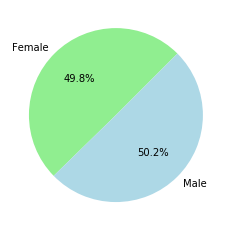

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female", "Male"]
colors=["lightgreen", "lightblue"]
startangle=45
genderdistribution=[49.8,50.2]
plt.pie(genderdistribution, labels=labels, colors=colors, startangle=45,autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [176]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Drugs=clean_df2[clean_df2["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
Drugs.sort_values(["Timepoint"], ascending=False)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
z581,Infubinol,Female,24,25,45,62.754451,3
l897,Capomulin,Male,17,19,45,38.846876,1
w914,Capomulin,Male,24,21,45,36.041047,2
a203,Infubinol,Female,20,23,45,67.973419,2
l733,Ceftamin,Female,4,30,45,64.299830,1
...,...,...,...,...,...,...,...
r811,Ramicane,Male,9,19,0,45.000000,0
j913,Ramicane,Female,4,17,0,45.000000,0
a275,Ceftamin,Female,20,28,0,45.000000,0


In [194]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=Drugs["Tumor Volume (mm3)"].quantile([.25,.50,.75])
quartiles

lowerq= quartiles[.25]
upperq=quartiles[.75]
IQR=upperq-lowerq   

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {IQR}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lowerbound=lowerq-(1.5*IQR)
upperbound=upperq+(1.5*IQR)

print(f"Values below {lowerbound} could be outliers.")
print(f"Values above {upperbound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 40.1807622075
The upper quartile of Tumor Volume (mm3) is: 50.3743208875
The interquartile range of Tumor Volume (mm3) is: 10.193558679999995
The the median of Tumor Volume (mm3) is: 45.0 
Values below 24.89042418750001 could be outliers.
Values above 65.66465890749998 could be outliers.


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_Time_vs_Tumorvolume=

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
